# P02_01_EDA

In [33]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

In [104]:
%config InlineBackend.figure_format = 'retina'


In [ ]:
from datetime import date
from datetime import datetime

In [34]:
section_fig_main_title = 'P02_01_EDA_'

In [ ]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib


In [110]:
csv_path = "../Data/Data_CME.csv"
df = pd.read_csv(csv_path, index_col='TARGET_ARRIVAL [UTC]', parse_dates=True)

In [111]:
# drop the first column
df = df.iloc[: , 1:]

In [112]:
df.head()

,HICAT_ID,SSE_LAUNCH [UTC],TARGET_NAME,ICMECAT_ID,SC_INSITU,ICME_START_TIME [UTC],ARRIVAL_DIFFERENCE [hrs],SC_HELIODISTANCE [AU],SC_LONG_HEEQ [deg],SC_LAT_HEEQ [deg],...,MO_MVA_AXIS_LAT [deg],MO_MVA_RATIO,GSR_START_TIME [UTC],GSR_START_TIME [UTC].1,GSR_AXIS_LONG [deg],GSR_AXIS_LAT [deg],GSR_IMPACT [AU],VHTX [kms-1],VHTY [kms-1],VHTZ [kms-1]
TARGET_ARRIVAL [UTC],,,,,,,,,,,,,,,,,,,,,
2007-05-25 20:06:00,HCME_A__20070521_01,2007-05-21 15:26,VENUS,ICME_VEX_SGOOD_20070525_01,VEX,2007-05-25 03:35,16,0,-53,1,...,53,2,NaN,NaN,0,0,0,9999,9999,9999
2007-05-25 09:26:00,HCME_A__20070521_01,2007-05-21 15:26,MESSENGER,ICME_MES_SGOOD_20070524_01,MESSENGER,2007-05-24 22:45,10,0,-55,-1,...,0,1,NaN,NaN,0,0,0,9999,9999,9999
2007-10-12 09:54:00,HCME_B__20071009_01,2007-10-08 17:47,VENUS,ICME_VEX_SGOOD_20071012_01,VEX,2007-10-12 17:24,-7,0,34,1,...,-18,4,NaN,NaN,0,0,0,9999,9999,9999
2007-11-17 18:18:00,HCME_B__20071115_01,2007-11-14 22:08,VENUS,ICME_VEX_SGOOD_20071117_01,VEX,2007-11-17 07:20,11,0,56,-3,...,67,19,NaN,NaN,0,0,0,9999,9999,9999
2007-12-07 08:34:00,HCME_B__20071204_01,2007-12-04 12:12,VENUS,ICME_VEX_SGOOD_20071207_01,VEX,2007-12-07 18:08,-9,0,69,-3,...,0,1,NaN,NaN,0,0,0,9999,9999,9999


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2007-05-25 20:06:00 to 2013-12-29 04:45:00
Data columns (total 38 columns):
HICAT_ID                    143 non-null object
SSE_LAUNCH [UTC]            143 non-null object
TARGET_NAME                 143 non-null object
ICMECAT_ID                  143 non-null object
SC_INSITU                   143 non-null object
ICME_START_TIME [UTC]       143 non-null object
ARRIVAL_DIFFERENCE [hrs]    143 non-null int64
SC_HELIODISTANCE [AU]       143 non-null int64
SC_LONG_HEEQ [deg]          143 non-null int64
SC_LAT_HEEQ [deg]           143 non-null int64
SOURCE_TYPE                 81 non-null object
SOURCE_LONG_HEEQ [deg]      143 non-null int64
SOURCE_LAT_HEEQ [deg]       143 non-null int64
FLARE_CLASS                 80 non-null object
FLARE_START_TIME [UTC]      76 non-null object
FLARE_END_TIME [UTC]        76 non-null object
FLARE_PEAK_TIME [UTC]       76 non-null object
CME_SSE_LONG_HEEQ [deg]     143 non-null int64
CME_SS

seperate the columns with dtype int64 

In [114]:
sub_df = df.select_dtypes('int64')
sub_df.head()

,ARRIVAL_DIFFERENCE [hrs],SC_HELIODISTANCE [AU],SC_LONG_HEEQ [deg],SC_LAT_HEEQ [deg],SOURCE_LONG_HEEQ [deg],SOURCE_LAT_HEEQ [deg],CME_SSE_LONG_HEEQ [deg],CME_SSE_LAT_HEEQ [deg],CME_SSE_SPEED [kms-1],CME_TARGET_SPEED [kms-1],...,MO_BZMIN [nT],MO_MVA_AXIS_LONG [deg],MO_MVA_AXIS_LAT [deg],MO_MVA_RATIO,GSR_AXIS_LONG [deg],GSR_AXIS_LAT [deg],GSR_IMPACT [AU],VHTX [kms-1],VHTY [kms-1],VHTZ [kms-1]
TARGET_ARRIVAL [UTC],,,,,,,,,,,,,,,,,,,,,
2007-05-25 20:06:00,16,0,-53,1,0,0,-66,4,306,297,...,-10,96,53,2,0,0,0,9999,9999,9999
2007-05-25 09:26:00,10,0,-55,-1,0,0,-66,4,306,300,...,-9,0,0,1,0,0,0,9999,9999,9999
2007-10-12 09:54:00,-7,0,34,1,25,-5,35,12,342,340,...,-6,173,-18,4,0,0,0,9999,9999,9999
2007-11-17 18:18:00,11,0,56,-3,0,0,50,-22,441,438,...,-8,140,67,19,0,0,0,9999,9999,9999
2007-12-07 08:34:00,-9,0,69,-3,0,0,75,4,446,436,...,-7,0,0,1,0,0,0,9999,9999,9999


In [139]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ARRIVAL_DIFFERENCE [hrs],143.0,0.510490,12.052624,-23.0,-9.0,0.0,10.0,23.0
SC_HELIODISTANCE [AU],143.0,0.258741,0.439483,0.0,0.0,0.0,1.0,1.0
SC_LONG_HEEQ [deg],143.0,-8.755245,59.251103,-151.0,-29.0,0.0,0.0,149.0
SC_LAT_HEEQ [deg],143.0,-0.482517,3.667238,-7.0,-3.0,-1.0,2.0,7.0
SOURCE_LONG_HEEQ [deg],143.0,-2.363636,31.020108,-88.0,-2.0,0.0,5.0,89.0
SOURCE_LAT_HEEQ [deg],143.0,1.405594,15.013720,-37.0,0.0,0.0,10.0,40.0
CME_SSE_LONG_HEEQ [deg],143.0,-9.594406,53.563736,-141.0,-27.0,-9.0,20.0,131.0
CME_SSE_LAT_HEEQ [deg],143.0,2.629371,13.518729,-38.0,-5.0,2.0,11.0,40.0
CME_SSE_SPEED [kms-1],143.0,600.132867,368.751572,224.0,373.5,482.0,702.0,2988.0
CME_TARGET_SPEED [kms-1],143.0,544.503497,326.319593,200.0,343.5,438.0,632.0,2639.0


check out the columns name. those with int64 dtype

In [115]:
# df['TARGET_ARRIVAL [UTC]'].head()

In [116]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install date_converter

change the dtype of ```TARGET_ARRIVAL [UTC]``` column to date

In [118]:
# df['TARGET_ARRIVAL [UTC]'] = pd.to_datetime(df['TARGET_ARRIVAL [UTC]'])

In [120]:
# df['TARGET_ARRIVAL [UTC]'].head()

In [129]:
# sns.pairplot(sub_df)
# plt.savefig("../Figures/" + section_fig_main_title +"pairplot.png")

In [27]:
# df['CME_TARGET_SPEED [kms-1]'].plot()

In [122]:
sub_df.columns

Index(['ARRIVAL_DIFFERENCE [hrs]', 'SC_HELIODISTANCE [AU]',
       'SC_LONG_HEEQ [deg]', 'SC_LAT_HEEQ [deg]', 'SOURCE_LONG_HEEQ [deg]',
       'SOURCE_LAT_HEEQ [deg]', 'CME_SSE_LONG_HEEQ [deg]',
       'CME_SSE_LAT_HEEQ [deg]', 'CME_SSE_SPEED [kms-1]',
       'CME_TARGET_SPEED [kms-1]', 'MO_BMEAN [nT]', 'MO_BSTD [nT]',
       'MO_BZMEAN [nT]', 'MO_BZMIN [nT]', 'MO_MVA_AXIS_LONG [deg]',
       'MO_MVA_AXIS_LAT [deg]', 'MO_MVA_RATIO', 'GSR_AXIS_LONG [deg]',
       'GSR_AXIS_LAT [deg]', 'GSR_IMPACT [AU]', 'VHTX [kms-1]', 'VHTY [kms-1]',
       'VHTZ [kms-1]'],
      dtype='object')

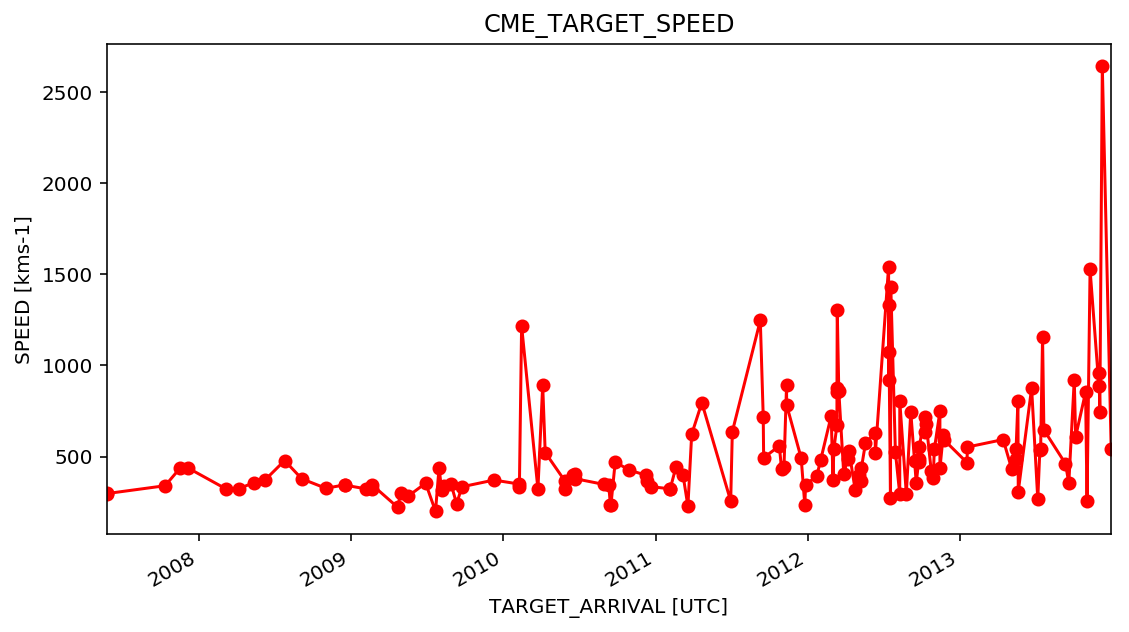

In [124]:

plt.figure(figsize=(9,5))
sub_df["CME_TARGET_SPEED [kms-1]"].plot(style="ro-")

plt.title("CME_TARGET_SPEED")
plt.ylabel("SPEED [kms-1]")
plt.savefig("../Figures/" + section_fig_main_title +"speedVSutc.png")

plt.show()

No handles with labels found to put in legend.


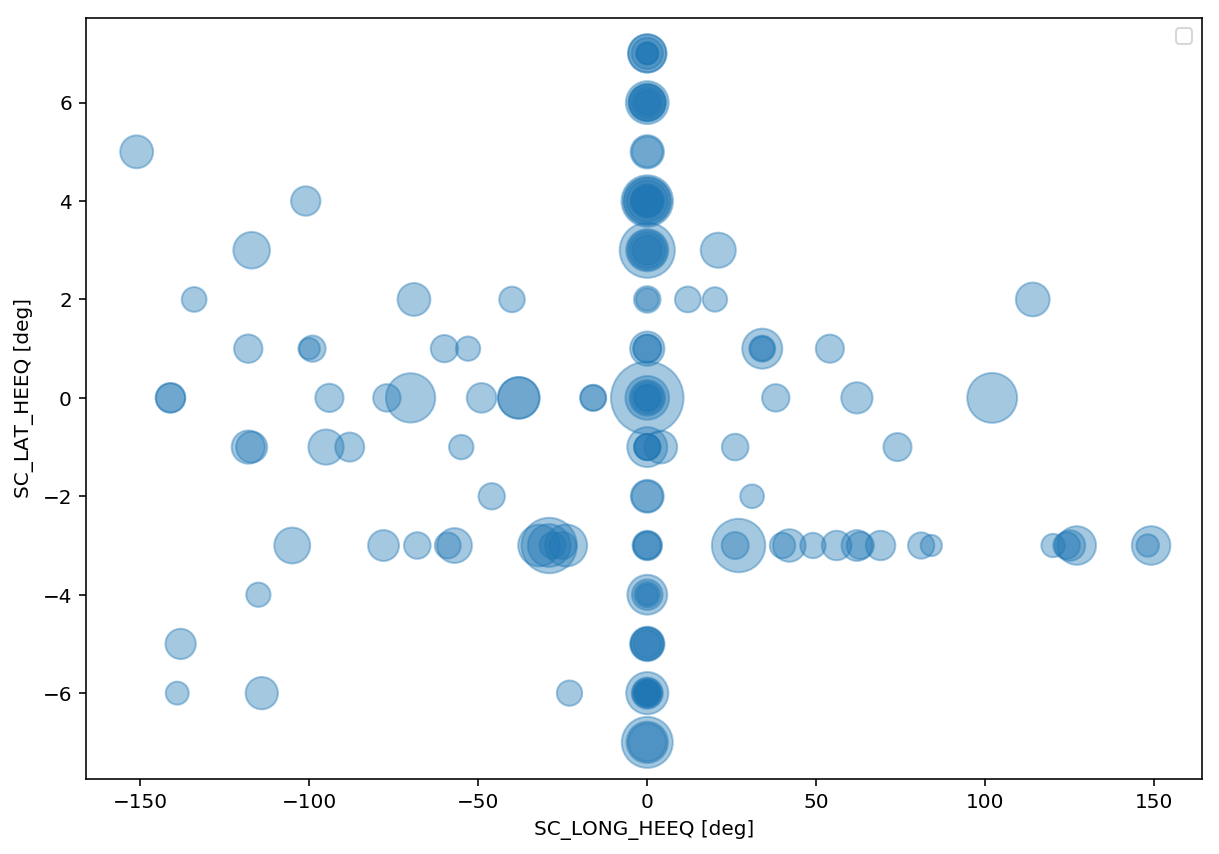

<Figure size 432x288 with 0 Axes>

In [133]:
ax = plt.gca()
df.plot(kind="scatter", 
            x="SC_LONG_HEEQ [deg]", 
            y="SC_LAT_HEEQ [deg]",
            s=sub_df['CME_TARGET_SPEED [kms-1]']/2, 
#             label="ARRIVAL_DIFFERENCE [hrs]", 
#             c=sub_df['VHTZ [kms-1]']/10, 
#             cmap=plt.get_cmap("jet"),
#             colorbar=True,
            alpha=0.4, figsize=(10,7), 
            ax = ax
            )

plt.legend()
plt.savefig("../Figures/" + section_fig_main_title +"arrivaVSCME_target.png")

plt.show()
plt.tight_layout()

In [125]:
sub_df.columns

Index(['ARRIVAL_DIFFERENCE [hrs]', 'SC_HELIODISTANCE [AU]',
       'SC_LONG_HEEQ [deg]', 'SC_LAT_HEEQ [deg]', 'SOURCE_LONG_HEEQ [deg]',
       'SOURCE_LAT_HEEQ [deg]', 'CME_SSE_LONG_HEEQ [deg]',
       'CME_SSE_LAT_HEEQ [deg]', 'CME_SSE_SPEED [kms-1]',
       'CME_TARGET_SPEED [kms-1]', 'MO_BMEAN [nT]', 'MO_BSTD [nT]',
       'MO_BZMEAN [nT]', 'MO_BZMIN [nT]', 'MO_MVA_AXIS_LONG [deg]',
       'MO_MVA_AXIS_LAT [deg]', 'MO_MVA_RATIO', 'GSR_AXIS_LONG [deg]',
       'GSR_AXIS_LAT [deg]', 'GSR_IMPACT [AU]', 'VHTX [kms-1]', 'VHTY [kms-1]',
       'VHTZ [kms-1]'],
      dtype='object')

No handles with labels found to put in legend.


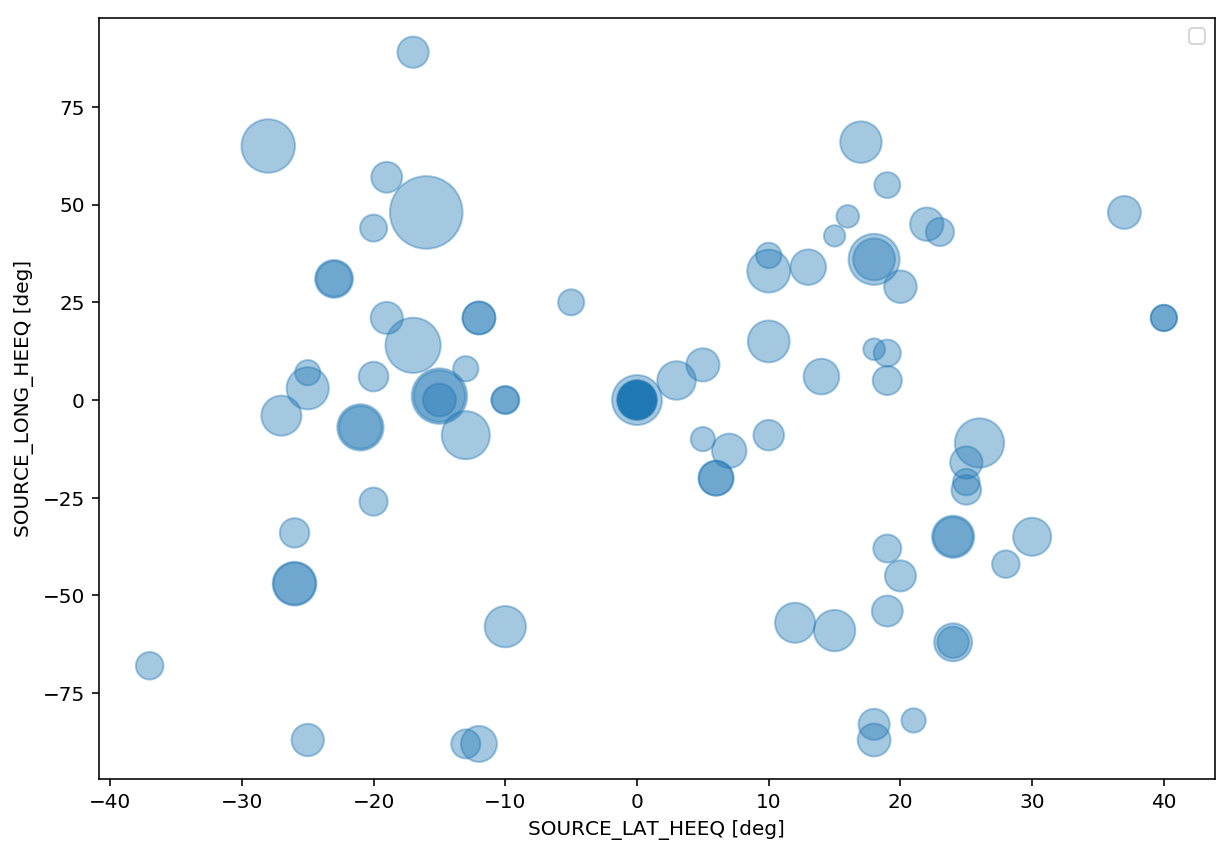

<Figure size 432x288 with 0 Axes>

In [134]:
ax = plt.gca()
df.plot(kind="scatter", 
            x="SOURCE_LAT_HEEQ [deg]", 
            y="SOURCE_LONG_HEEQ [deg]",
            s=sub_df['CME_TARGET_SPEED [kms-1]']/2, 
#             label="ARRIVAL_DIFFERENCE [hrs]", 
#             c=sub_df['VHTZ [kms-1]']/10, 
#             cmap=plt.get_cmap("jet"),
#             colorbar=True,
            alpha=0.4, figsize=(10,7), 
            ax = ax
            )

plt.legend()
plt.savefig("../Figures/" + section_fig_main_title +"arrivaVSCME_target.png")

plt.show()
plt.tight_layout()

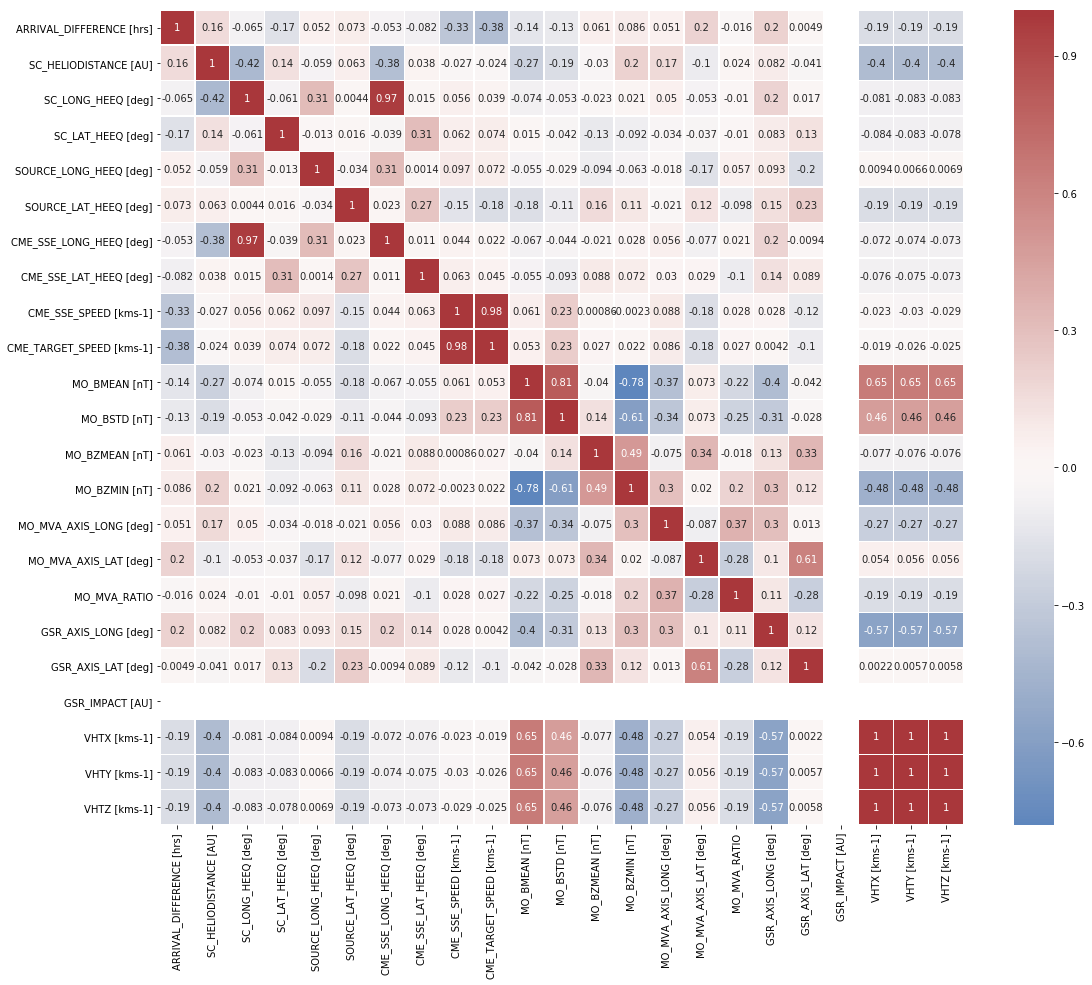

In [99]:
sub_df_corr = sub_df.corr()
plt.figure(figsize=(18,15))

sns.heatmap(sub_df_corr, 
            xticklabels=sub_df_corr.columns,
            yticklabels=sub_df_corr.columns,
            cmap='vlag',
            annot=True,
            linewidth=0.5, center=0,
#             vmin=-0.7, vmax=0.7
           )
plt.savefig("../Figures/" + section_fig_main_title +"corr.png")
plt.show()
